In [27]:
import os
import warnings

import act
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates


import numpy as np
import pyart
import xarray as xr

warnings.filterwarnings("ignore")

In [19]:
#ds_dl = act.io.read_arm_netcdf(result_dl)

path_head = '/data/home/ajmal13/blimp/scripts/bnfdlfptM1.b1/'
ds_dl = xr.open_mfdataset(os.path.join(path_head+'*.cdf'))

ds_dl

<xarray.Dataset> Size: 4GB
Dimensions:                 (time: 654758, range: 400)
Coordinates:
  * time                    (time) datetime64[ns] 5MB 2025-04-04T00:00:53.859...
  * range                   (range) float32 2kB 15.0 45.0 ... 1.198e+04
Data variables: (12/13)
    base_time               (time) datetime64[ns] 5MB 2025-04-04 ... 2025-04-11
    time_offset             (time) datetime64[ns] 5MB dask.array<chunksize=(3405,), meta=np.ndarray>
    azimuth                 (time) float32 3MB dask.array<chunksize=(3405,), meta=np.ndarray>
    elevation               (time) float32 3MB dask.array<chunksize=(3405,), meta=np.ndarray>
    radial_velocity         (time, range) float32 1GB dask.array<chunksize=(3405, 400), meta=np.ndarray>
    qc_radial_velocity      (time, range) int32 1GB dask.array<chunksize=(3405, 400), meta=np.ndarray>
    ...                      ...
    attenuated_backscatter  (time, range) float32 1GB dask.array<chunksize=(3405, 400), meta=np.ndarray>
    pitch                   (time) float32 3MB dask.array<chunksize=(3405,), meta=np.ndarray>
    roll                    (time) float32 3MB dask.array<chunksize=(3405,), meta=np.ndarray>
    lat                     (time) float64 5MB 34.34 34.34 34.34 ... 34.34 34.34
    lon                     (time) float64 5MB -87.34 -87.34 ... -87.34 -87.34
    alt                     (time) float64 5MB 297.0 297.0 297.0 ... 297.0 297.0
Attributes: (12/26)
    command_line:                dl_ingest -s bnf -f M1 --max-runtime 0
    Conventions:                 ARM-1.3
    process_version:             ingest-dl-2.32-0.el9
    dod_version:                 dlfpt-b1-1.3
    input_source:                /data/collection/bnf/bnfdlM1.00/Stare_237_20...
    site_id:                     bnf
    ...                          ...
    dlon:                        -87.337860 degree_E, East longitude in doubl...
    home_point_azimuth:          0.000000
    target_latitude:             34.342338
    target_longitude:            -87.337860
    target_altitude:             297.000000
    history:                     created by user armflowprod on machine prod-...

In [ ]:
ds_dl.sel(time=slice(start_plot_date,end_plot_date),range=slice(0, 6000))

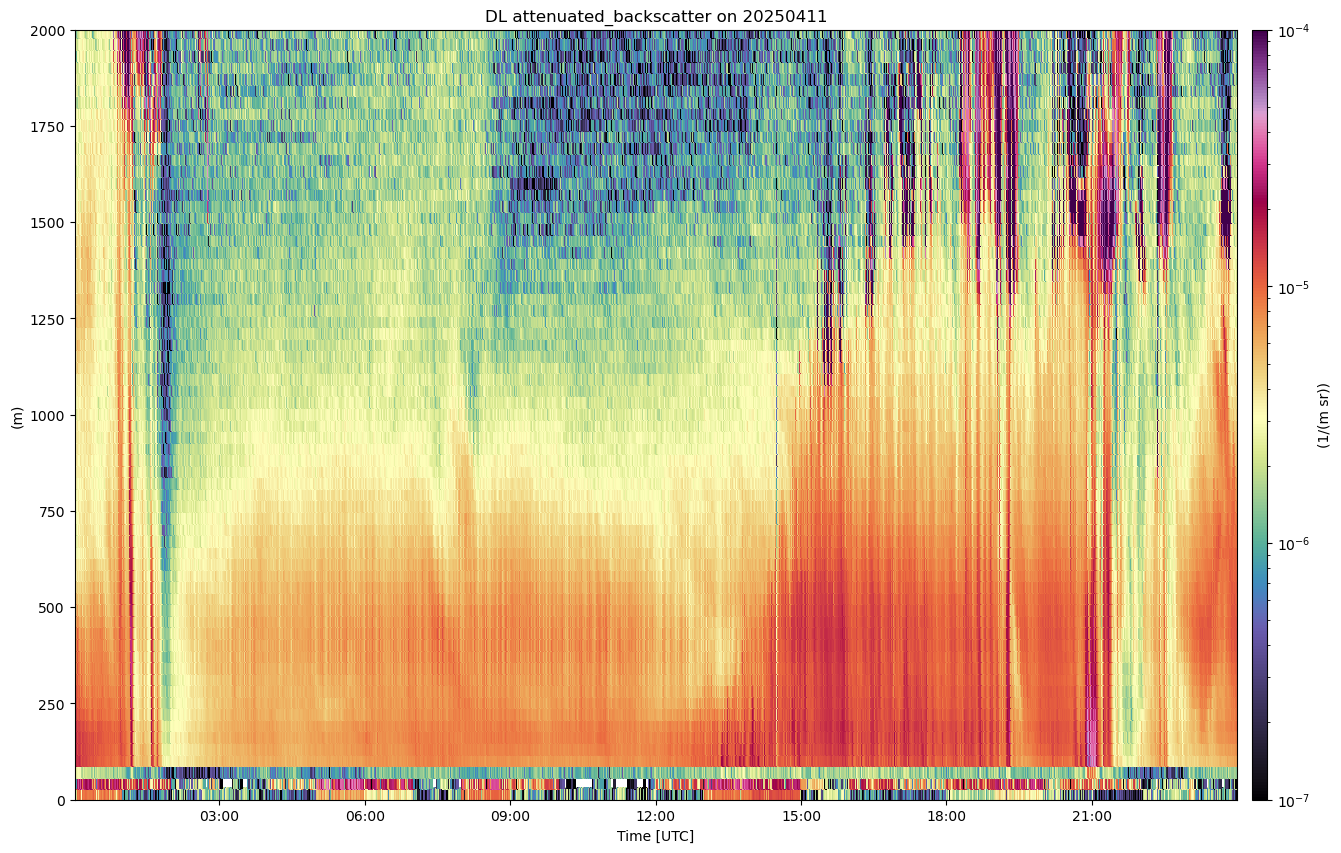

In [25]:
#And plot again!
# Create a plotting display object with 2 plots
# Note we have to create a dictionary of datasets to pass in
start_plot_date = '2025-04-11T00:00:00'
end_plot_date = '2025-04-11T23:59:59'

height_range = [0, 2000]

display = act.plotting.TimeSeriesDisplay({'DL': ds_dl.sel(time=slice(start_plot_date,end_plot_date),range=slice(0, 6000))}
                                         , figsize=(15, 10)
                                        )



# Plot up the variable in the first plot
# Need to specify the dsname so it knows which dataset
# to use for this data.  This is helpful when datasets 
# have similar variable names
display.plot('attenuated_backscatter', dsname='DL',norm=colors.LogNorm(vmin=1e-7,vmax=1e-4),
             cmap="ChaseSpectral")

display.set_yrng([0,2000])

In [20]:

start_plot_date = '2025-04-11T00:00:00'
end_plot_date = '2025-04-11T23:59:59'
ds_dl_plot=ds_dl.sel(time=slice(start_plot_date,end_plot_date),range=slice(0, 6000))

In [24]:
attn_backscatter=np.transpose(ds_dl_plot.attenuated_backscatter.values)
alt = ds_dl_plot.range.values
timestamps = ds_dl_plot.time.values

Text(0, 0.5, '1/(m Sr)')

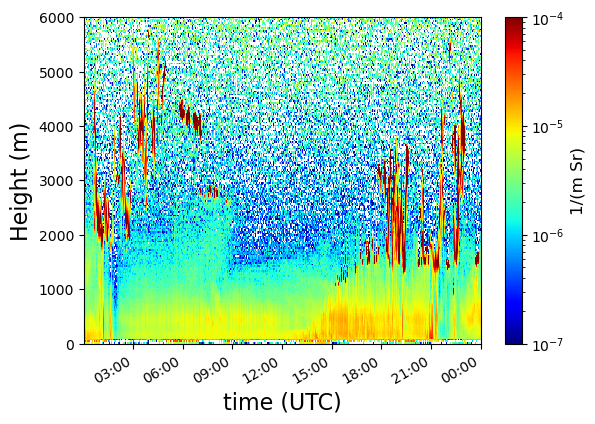

In [35]:
fig = plt.figure()
ax = fig.add_subplot()
c = plt.pcolormesh(timestamps,alt,np.transpose(ds_dl_plot.attenuated_backscatter.values),norm=colors.LogNorm(vmin=1e-07, vmax=1e-04),
                   cmap='jet')
#plt.ylim([0, 3000])
cbar=plt.colorbar(c)
plt.ylabel('Height (m)',fontsize = 16)
plt.xlabel('time (UTC)',fontsize = 16)
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
fig.autofmt_xdate()
cbar.ax.set_ylabel('1/(m Sr)', fontsize=12)
